In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
image_path = r"C:\Users\Pranshu Saini\Desktop\360_F_718128776_nJReWqPkf5qF4Y5na8ZqGWAbdCJTpczZ.jpg"


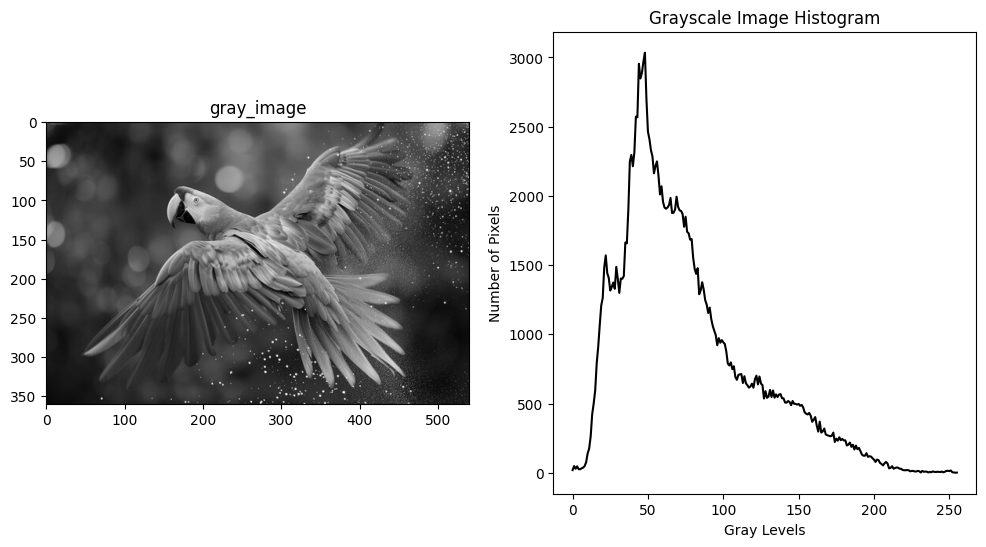

In [33]:

gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("gray_image")
plt.subplot(1, 2, 2)
plt.plot(gray_hist, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Number of Pixels")



plt.show()


<Figure size 1200x600 with 0 Axes>

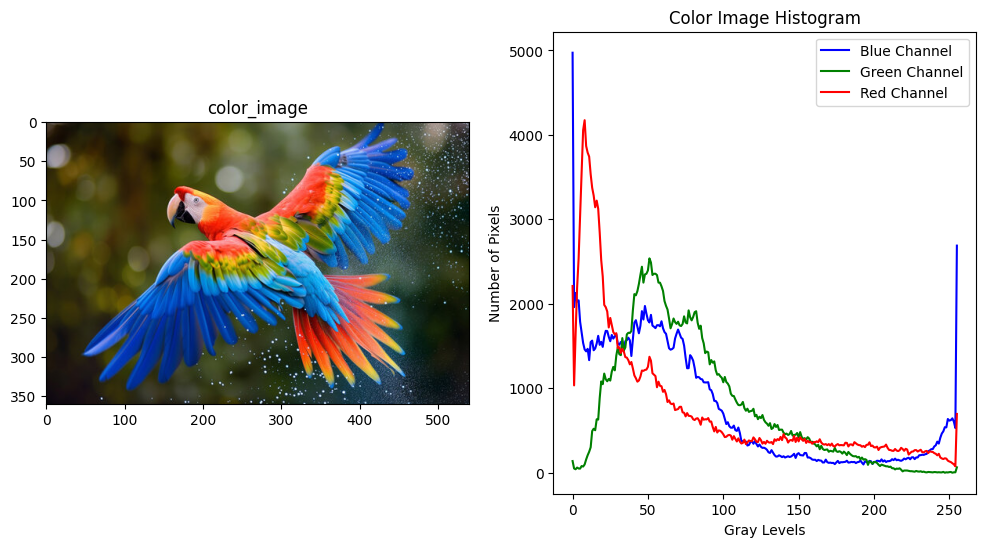

In [34]:
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
blue_hist = cv2.calcHist([color_image], [0], None, [256], [0, 256])
green_hist = cv2.calcHist([color_image], [1], None, [256], [0, 256])
red_hist = cv2.calcHist([color_image], [2], None, [256], [0, 256])
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(color_image, cmap='gray')
plt.title("color_image")
plt.subplot(1, 2, 2)
plt.plot(blue_hist, color='b', label="Blue Channel")
plt.plot(green_hist, color='g', label="Green Channel")
plt.plot(red_hist, color='r', label="Red Channel")
plt.title("Color Image Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Number of Pixels")
plt.legend()

plt.show()

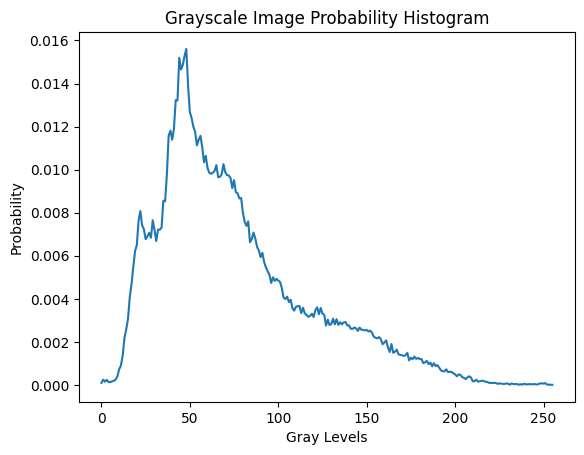

In [40]:
gray_hist_normalized = gray_hist / gray_hist.sum()
blue_hist_normalized = blue_hist / blue_hist.sum()
green_hist_normalized = green_hist / green_hist.sum()
red_hist_normalized = red_hist / red_hist.sum()


plt.plot(gray_hist_normalized)
plt.title("Grayscale Image Probability Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Probability")



plt.show()


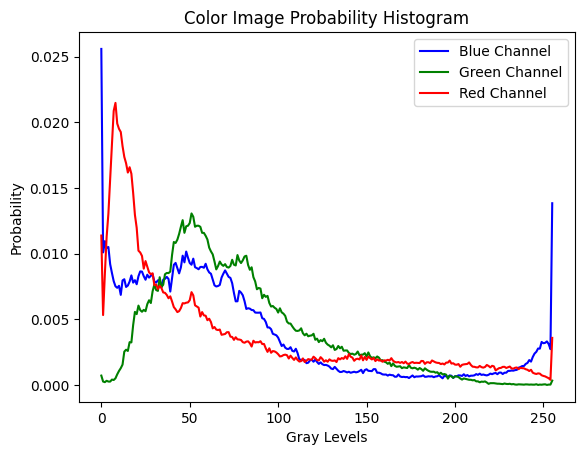

In [39]:
blue_hist_normalized = blue_hist / blue_hist.sum()
green_hist_normalized = green_hist / green_hist.sum()
red_hist_normalized = red_hist / red_hist.sum()
plt.plot(blue_hist_normalized, color='b', label="Blue Channel")
plt.plot(green_hist_normalized, color='g', label="Green Channel")
plt.plot(red_hist_normalized, color='r', label="Red Channel")
plt.title("Color Image Probability Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Probability")
plt.legend()

plt.show()

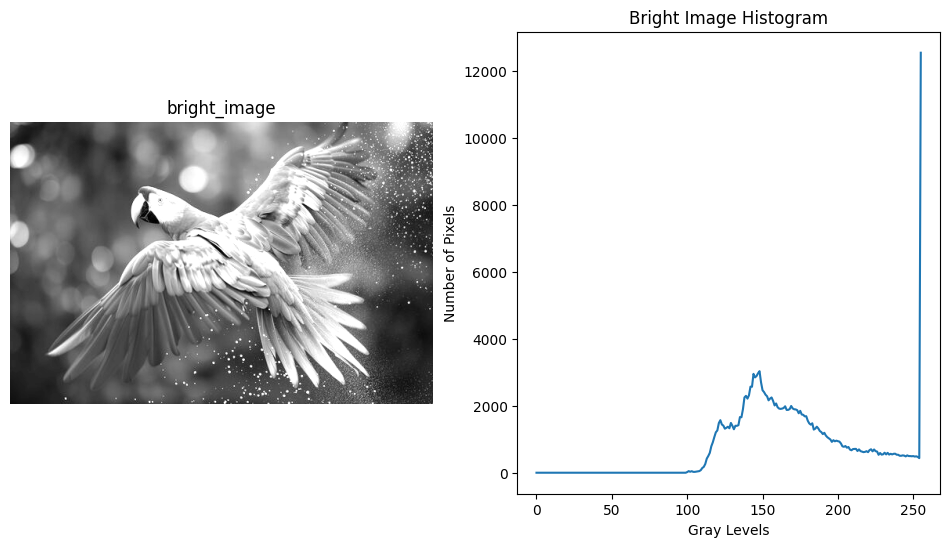

In [41]:
bright_image = cv2.convertScaleAbs(gray_image, alpha=1, beta=100) 

bright_hist = cv2.calcHist([bright_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bright_image, cmap='gray')
plt.title("bright_image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.plot(bright_hist)
plt.title("Bright Image Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Number of Pixels")
plt.show()



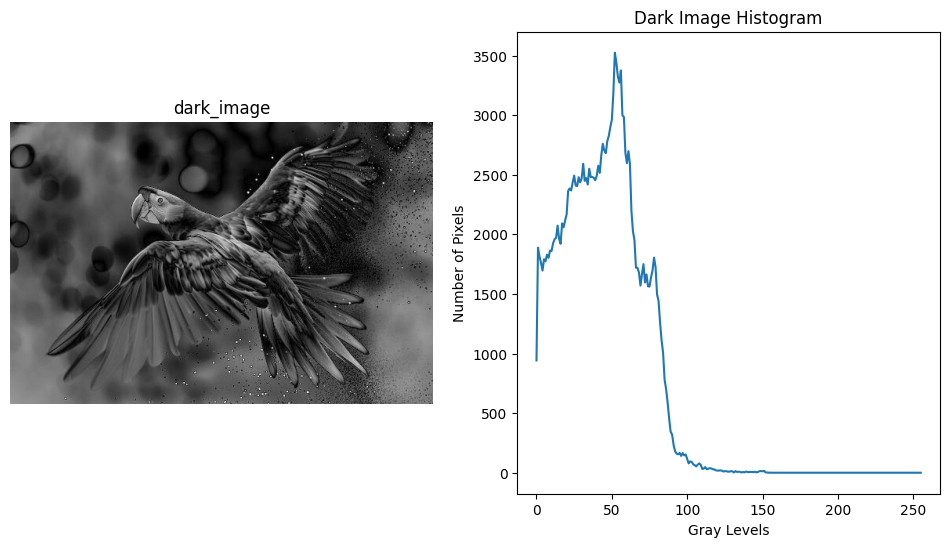

In [42]:
dark_image = cv2.convertScaleAbs(gray_image, alpha=1, beta=-100) 
dark_hist = cv2.calcHist([dark_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(dark_image, cmap='gray')
plt.title("dark_image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.plot(dark_hist)
plt.title("Dark Image Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Number of Pixels")

plt.show()


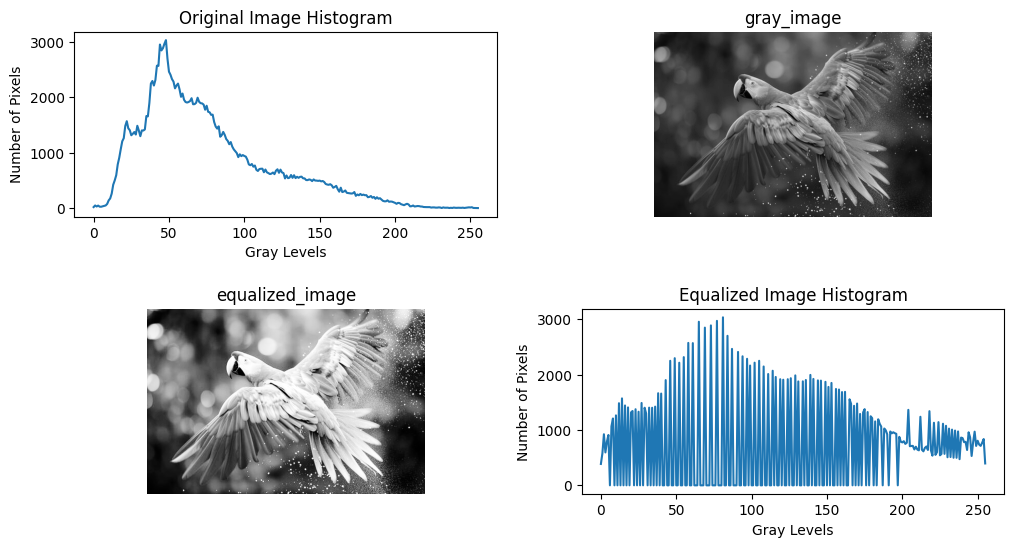

In [52]:
equalized_image = cv2.equalizeHist(gray_image)

equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(gray_hist)
plt.title("Original Image Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Number of Pixels")


plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("equalized_image")
plt.axis('off')
plt.subplots_adjust(hspace=0.5)  # Control the gap between rows

plt .subplot(2,2,2)
plt.imshow(gray_image, cmap='gray')
plt.title("gray_image")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.plot(equalized_hist)
plt.title("Equalized Image Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Number of Pixels")

plt.show()


In [19]:
#task2

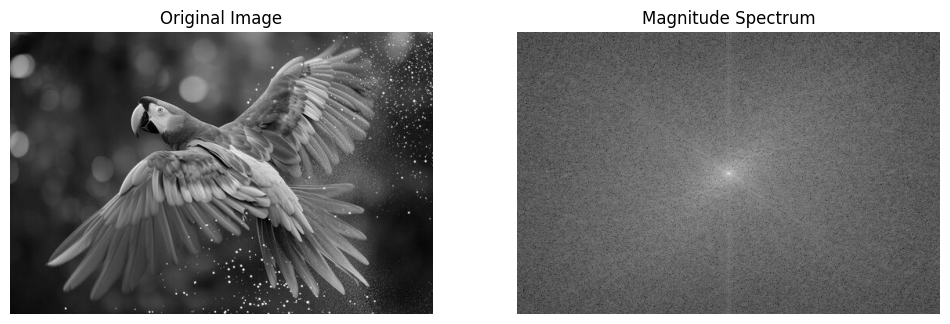

In [20]:
# Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Perform FFT
f = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f)  # Shift zero frequency component to center
magnitude_spectrum = np.abs(fshift)

# Display the original image and magnitude spectrum
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.show()


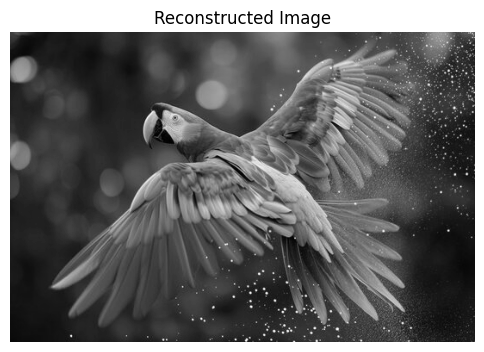

In [23]:
# Perform inverse FFT
f_ishift = np.fft.ifftshift(fshift)
img_reconstructed = np.fft.ifft2(f_ishift)
img_reconstructed = np.abs(img_reconstructed)

# Display reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(img_reconstructed, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()


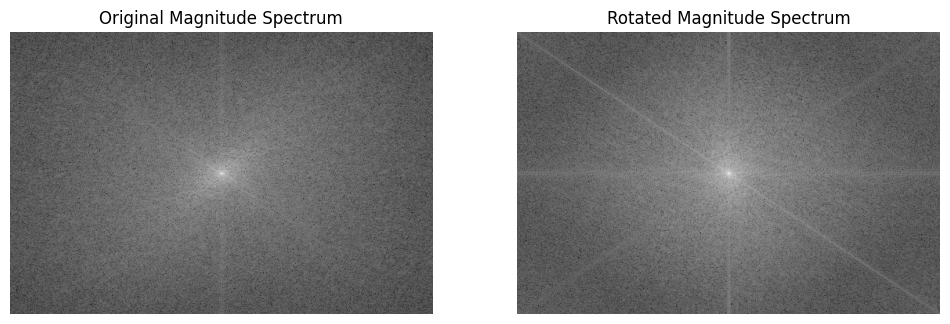

In [24]:
# Rotate the original image by 45 degrees
rows, cols = gray_image.shape
center = (cols // 2, rows // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (cols, rows))

# Perform FFT on the rotated image
f_rot = np.fft.fft2(rotated_image)
fshift_rot = np.fft.fftshift(f_rot)
magnitude_spectrum_rot = np.abs(fshift_rot)

# Display the magnitude spectrum of the rotated image
plt.figure(figsize=(12, 6))

# Original Image Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title("Original Magnitude Spectrum")
plt.axis('off')

# Rotated Image Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + magnitude_spectrum_rot), cmap='gray')
plt.title("Rotated Magnitude Spectrum")
plt.axis('off')

plt.show()
